In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
from bokeh.io import output_notebook
from dask.diagnostics import ResourceProfiler, ProgressBar
%load_ext autoreload
%autoreload 2
output_notebook()

Loading BokehJS ...

In [ ]:
bgen_path='/home/eczech/data/rs-ukb-local/bgen/ukb_imp_chrXY_v3.bgen'

In [4]:
n_bytes = 536870912 # 512MiB
#n_bytes = 268435456 # 256MiB
n_variants = 1024
n_samples = (n_bytes // 4) // n_variants
n_variants, n_samples

(1024, 131072)

### Profiling

Whole file: 17min 47s for pybgen on 8 cores

In [5]:
def get_arr(ds):
    return ds['call_dosage'][:10_000].mean(dim='samples').data

----

PyBGEN

In [6]:
from sgkit_bgen.pybgen import read_bgen as pybgen_read_bgen
ds = pybgen_read_bgen(path=bgen_path, chunks=(n_variants, n_samples))
arr = get_arr(ds)
arr

dask.array<mean_agg-aggregate, shape=(10000,), dtype=float32, chunksize=(1024,), chunktype=numpy.ndarray>

In [7]:
%%time
with ProgressBar(), ResourceProfiler() as prof:
    m = arr.compute(scheduler='processes')

[########################################] | 100% Completed |  6min 55.7s
CPU times: user 46.1 s, sys: 1.63 s, total: 47.7 s
Wall time: 6min 56s


In [8]:
prof.visualize()

Figure(id='1002', ...)

In [9]:
pd.Series(m).describe()

count    10000.000000
mean         0.143656
std          0.342490
min          0.000014
25%          0.000385
50%          0.001735
75%          0.036393
max          1.974507
dtype: float64

<AxesSubplot:ylabel='Frequency'>

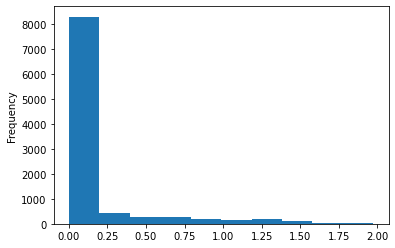

In [10]:
pd.Series(m).plot(kind='hist')

-----

CBGEN

In [6]:
from sgkit_bgen.cbgen_reader import read_bgen as cgben_read_bgen
ds = cgben_read_bgen(path=bgen_path, chunks=(n_variants, n_samples))
arr = get_arr(ds)
arr

dask.array<mean_agg-aggregate, shape=(10000,), dtype=float32, chunksize=(1024,), chunktype=numpy.ndarray>

In [7]:
%%time
with ProgressBar(), ResourceProfiler() as prof:
    m = arr.compute(scheduler='processes')

[########################################] | 100% Completed |  7min 27.2s
CPU times: user 6.28 s, sys: 1.22 s, total: 7.5 s
Wall time: 7min 27s


In [8]:
prof.visualize()

Figure(id='1002', ...)

In [9]:
pd.Series(m).describe()

count    10000.000000
mean         0.143656
std          0.342490
min          0.000014
25%          0.000385
50%          0.001735
75%          0.036393
max          1.974507
dtype: float64

<AxesSubplot:ylabel='Frequency'>

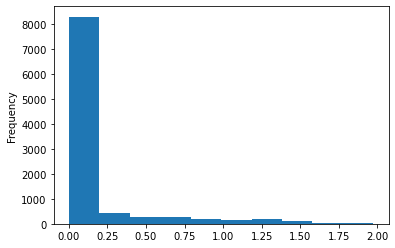

In [10]:
pd.Series(m).plot(kind='hist')